In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [45]:
columns = ['Timestamp', 'ID', 'DLC', 'Data0', 'Data1', 'Data2', 'Data3', 'Data4',
       'Data5', 'Data6', 'Data7', 'Label']
df = pd.read_csv('../Data/Car-Hacking/gear_dataset.csv', names=columns)
df

,Timestamp,ID,DLC,Data0,Data1,Data2,Data3,Data4,Data5,Data6,Data7,Label
0,1.478193e+09,0140,8,00,00,00,00,10,29,2a,24,R
1,1.478193e+09,02c0,8,15,00,00,00,00,00,00,00,R
2,1.478193e+09,0350,8,05,20,44,68,77,00,00,7e,R
3,1.478193e+09,0370,8,00,20,00,00,00,00,00,00,R
4,1.478193e+09,043f,8,10,40,60,ff,78,c4,08,00,R
...,...,...,...,...,...,...,...,...,...,...,...,...
4443137,1.478201e+09,018f,8,fe,59,00,00,00,41,00,00,R
4443138,1.478201e+09,0260,8,18,21,21,30,08,8f,6d,19,R
4443139,1.478201e+09,02a0,8,24,00,9a,1d,97,02,bd,00,R
4443140,1.478201e+09,0329,8,dc,b7,7f,14,11,20,00,14,R


In [53]:
transform_cols = ['ID'] + ['Data'+str(x) for x in range(8)]
for c in transform_cols:
    df['transformed_'+c].apply(lambda x: int(str(x), 16))

0           320
1           704
2           848
3           880
4          1087
           ... 
4443137     399
4443138     608
4443139     672
4443140     809
4443141    1349
Name: ID, Length: 4443142, dtype: int64

In [26]:
canid_label_count = df.groupby(by=['ID', 'Label'])['Label'].count()
canid_label_count

ID    Label
0000  T        587521
0002  R        167556
00a0  R         16673
00a1  R         16613
0130  R        168118
0131  R        167016
0140  R        167002
0153  R        166573
018f  R        166931
01f1  R         84707
0260  R        165681
02a0  R        165614
02c0  R        166713
0316  R        166631
0329  R        164927
0350  R        165585
0370  R        166681
0430  R         85005
043f  R        166103
0440  R        165057
04b1  R         84219
04f0  R         82108
0545  R        162045
05a0  R          1636
05a2  R          1610
0690  R         16258
Name: Label, dtype: int64

In [27]:
# time_range in sec
def count_message_within(df, time_range=1):
    bins = np.arange(start=df.Timestamp.min(), stop=df.Timestamp.max(), step=time_range)
    split_time_interval = pd.cut(df['Timestamp'], bins, include_lowest=True)
    cnt = df.groupby(split_time_interval).count()['Timestamp'].tolist()
    return cnt 

In [46]:
cnts = count_message_within(df, time_range=0.01)

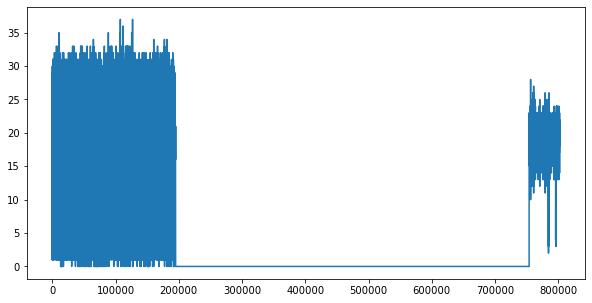

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(cnts)

In [48]:
pd.DataFrame(cnts).describe()

,0
count,801900.000000
mean,5.540746
std,9.062434
min,0.000000
25%,0.000000
50%,0.000000
75%,16.000000
max,37.000000
